# Training a neural network for Banknote Authenticity Detection with Tensorflow & Keras



In [31]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In this exercise you will work with a dataset containing information about banknotes, to determines whether a banknote is fake or not. These information was extracted from images that were taken for the evaluation of an authentication procedure for banknotes.
More details in:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

The list of features is:
- Variance of Wavelet Transformed image (continuous).
- Skewness of Wavelet Transformed image (continuous).
- Kurtosis of Wavelet Transformed image (continuous).
- Entropy of image (continuous).

The last column of the dataset indicates the target variable (label), which is represented by the class a banknote belongs to:
- Class (0 for authentic, 1 for inauthentic).

As first task define read the .csv file into a pandas dataframe called df_banknote. 
Pay attention that the original file doesnot include a header. For later convenience, while reading the file into the dataframe,
you should also assign name to the column features, namely "Variance", "Skewness", "Kurtosis", "Entropy", "Class"

In [32]:
df_banknote = pd.read_csv('data_banknote_authentication.txt', sep=',', names=['Variance','Skewness','Kurtosis','Entropy','Class']) ### ADD CODE HERE####


X = df_banknote.drop(['Class'],axis=1).values
y = df_banknote['Class'].values

X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.20)

Print the summary statistics of the dataset and get an idea of variable ranges and values 

In [33]:
### ADD CODE HERE ####
df_banknote.describe() 

,Variance,Skewness,Kurtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [34]:
X_val, X_train = X_train_full[:150], X_train_full[150:] 
y_val, y_train = y_train_full[:150], y_train_full[150:]

In [35]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

### Create and train the model


Now the main task is for you to define a Neural Network model!
You decide to use a neural network model to build a classifier, which takes as input all available features (how many there are?) and predicts the most likely class, to which a sample belongs to. 

Write the code in the next cell to build a fully connected neural network composed by 2 hidden layers, with the following structure:
-	Layer 1: 16 nodes (or neurons), each with a Tanh activation function 
-	Layer 2: 8 nodes (or neurons), each with a ReLU activation function  

Attention: By choosing the properties of the output layer, take into account the information regarding the target variable and the type of problem you are dealing with (e.g. Regression?, Binary Classification? Multi-Class Classification?).  

In [36]:
#ADD CODE HERE 
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='tanh', input_dim = 4),
    tf.keras.layers.Dense(8, activation ='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') #binary classification problem
])



In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                80        
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 225 (900.00 Byte)
Trainable params: 225 (900.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


You are almost there, what you need to do now it to choose the right loss function to use, depending on the type of problem you are dealing with. 
Insert this missing information in the cell under. 

Remember what we said in the class about the option 'from_logits'!

In [38]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False) ## ADD CODE HERE
              ,optimizer="sgd", metrics=["accuracy"]) 

In [39]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10


30/30 [==============================] - 1s 7ms/step - loss: 0.6322 - accuracy: 0.7529 - val_loss: 0.5746 - val_accuracy: 0.8133
Epoch 2/10
30/30 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.7740 - val_loss: 0.5214 - val_accuracy: 0.8333
Epoch 3/10
30/30 [==============================] - 0s 2ms/step - loss: 0.5251 - accuracy: 0.8226 - val_loss: 0.4742 - val_accuracy: 0.8667
Epoch 4/10
30/30 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.8701 - val_loss: 0.4338 - val_accuracy: 0.9067
Epoch 5/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4491 - accuracy: 0.8838 - val_loss: 0.3992 - val_accuracy: 0.9267
Epoch 6/10
30/30 [==============================] - 0s 3ms/step - loss: 0.4189 - accuracy: 0.8912 - val_loss: 0.3680 - val_accuracy: 0.9267
Epoch 7/10
30/30 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8944 - val_loss: 0.3403 - val_accuracy: 0.9267
Epoch 8/10
30/30 [=============

It is time now to evaluate your model, of course on the test set!

In [41]:
### ADD CODE HERE ####
model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 984us/step - loss: 0.3483 - accuracy: 0.8873


[0.3483147919178009, 0.8872727155685425]

Now check directly some single predictions from the test set.

In [42]:
X_new = X_test[0:5]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 59ms/step


array([[0.34],
       [0.12],
       [0.85],
       [0.18],
       [0.84]], dtype=float32)

In [43]:
y_pred = (y_proba > 0.5).astype("int32")


y_pred

array([[0],
       [0],
       [1],
       [0],
       [1]], dtype=int32)

In [44]:
y_test[0:5]

array([0, 0, 1, 0, 1])

9/9 [==============================] - 0s 2ms/step


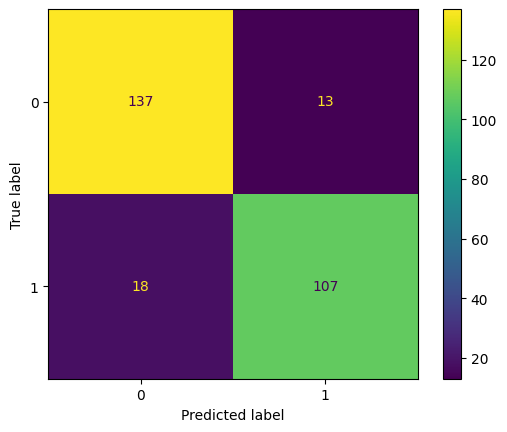

In [50]:
#using last week snippet from Logistic Regression notebook, implement the code that provide
#you the confusion matrix. 

y_proba_new = model.predict(X_test)
y_pred_new = (y_proba_new > 0.5).astype("int32")

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay# for this plot sklearn >= 1.0.1 is needed
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_new, labels=None)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=None)
disp.plot()
plt.show()